# How food shapes the World - Ada project

With 7.7 billion people around the world in 2019, food demand outbreak has raised serious concerns regarding productive agricultural land availability. As for now cultivable surface expansion has been the only real solution, this project aims at providing insights on how this problematic is currently shaping the world’s surface as we know it. Investigation will first focus on the kind of environment that are being impinged on. Moving on to the “destructive” impact of certain foodstuffs and diet trends, correlating with international trade flows. This study relies on FAOSTAT data set from the United Nation, helping us in the process.
We endeavor at providing an exhaustive visualization of the world under growing food reshaping pressure. Key features will be surface evolution across time and space, selected crops impact as well as involved parties and areas. Tackling all of the above with both social awareness and self consciousness concerns.

## Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Opening the dataset

First of all, we need to open the dataset on which we are working. That is, loading it and displayint as much of it as possible to get a better view from it.

In [17]:
datapath = "Data/global-food-agriculture-statistics/"
current_fao = "current_FAO/raw_files/"

savanna = pd.read_csv(datapath + current_fao + "Emissions_Agriculture_Burning_Savanna_E_All_data_(Norm).csv", sep=",", encoding="ANSI")  # Less savanna
crops = pd.read_csv(datapath + "fao_data_crops_data.csv", sep=",", encoding="UTF-8")                                                     # Where every products are planted
forests = pd.read_csv(datapath + current_fao + "Emissions_Land_Use_Forest_Land_E_All_Data_(Norm).csv", sep=",", encoding="ANSI")         # Less forests
livestock = pd.read_csv(datapath + current_fao + "Trade_Crops_Livestock_E_All_Data_(Normalized).csv", sep=",", encoding="ANSI")          # Imports and exports 

We will now investigate each dataset and start to correlate them depending on the questions we want to answer for Milestone 3. 

### Table of contents

1. [Savanna](#savanna) 
2. [Forests](#forests)
3. [Merge of the Biomes Data Sets](#merge)
4. [Crops](#crops)
5. [Livestock](#livestock)
6. [Data to answer the questions](#questions)

<a id="savanna"></a>
### Savanna

In [3]:
savanna.dtypes

Country Code      int64
Country          object
Item Code         int64
Item             object
Element Code      int64
Element          object
Year Code         int64
Year              int64
Unit             object
Value           float64
Flag             object
dtype: object

In [4]:
savanna.head(1)

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6760,Savanna,7246,Burned Area,1990,1990,Ha,0.9251,Fc


#### Description:
In this dataframe we have the following columns:
- Country Code: One specific number per country
- Country: list of country
- Item Code: One specific number per Item
- Item: A list of different ecosystems
- Element Code: One specific munber per element
- Element: What was actually calculated, measured or estimated
- Year Code: One specific number per year (same as the year)
- Year: The actual year
- Unit: What is the unit of the value of "Value"
- Value: The value found for the element
- Flag: Info on where the data comes from (Fc, A, NaN, F)

There is a total of 50'000 rows.

All the years are registred since 1990 until 2014. There is then prediction for year 2030 and 2050.

There is a total of 275 country like entries

#### Selection of useful data
As we are only interested in the area lost to burnings. We can do a first selection:

In [5]:
savannaSurface = savanna[savanna['Element'].str.match('Burned Area')]
savannaSurface.head()

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6760,Savanna,7246,Burned Area,1990,1990,Ha,0.9251,Fc
1,2,Afghanistan,6760,Savanna,7246,Burned Area,1991,1991,Ha,0.9251,Fc
2,2,Afghanistan,6760,Savanna,7246,Burned Area,1992,1992,Ha,0.9251,Fc
3,2,Afghanistan,6760,Savanna,7246,Burned Area,1993,1993,Ha,0.9251,Fc
4,2,Afghanistan,6760,Savanna,7246,Burned Area,1994,1994,Ha,0.9251,Fc


In [6]:
savanna.Item.drop_duplicates()

0                         Savanna
207                 Woody savanna
444              Closed shrubland
685                Open shrubland
928                     Grassland
1169     Burning - all categories
1358    Savanna and woody savanna
1547    Closed and open shrubland
Name: Item, dtype: object

Here is a list of all the different type of ecosystem on which we have data. It seems to contain 2 types of savana, two type of shrubland and grassland. In addition, the tree last categories are aparently agglomeration of the other items.
Lets verify that:
- The Savanna and woody savanna contains the values under the item Savanna and woody savanna.
- Closed and open shrubland contains the values under the item closed shrubland and open shrubland.
- Burning - all categories is a sum of all the types of ecosystem.

To do that:

In [7]:
world_90 = savannaSurface.Value[(savannaSurface['Year']==1990)  & (savannaSurface['Country']=='World')].tolist()
print('Total Savana : ', world_90[0] + world_90[1],' is equal to ', world_90[6])
print('Total shrubland : ', world_90[2] + world_90[3],' is equal to ', world_90[7])
print('Total Surfaces : ', sum(world_90[:5]), ' is equal to ', world_90[5])

Total Savana :  245098958.1444  is equal to  245098958.1444
Total shrubland :  26547260.456800003  is equal to  26547260.4567
Total Surfaces :  311619836.7884  is equal to  311619836.7883


Our hypothesis were indeed correct. There are three main categories: Savana, Shrubland and grassland with subcategories. We also have the total surfaces burned in "Burning - all categories".

We only keep the main Categories: Savana, Shrubland and grassland:

In [8]:
savannaSurface = savannaSurface[(savannaSurface['Item']=='Savanna and woody savanna') | (savannaSurface['Item']=='Closed and open shrubland') | (savannaSurface['Item']=='Grassland')]
savannaSurface = savannaSurface.replace('Savanna and woody savanna','Savanna')
savannaSurface = savannaSurface.replace('Closed and open shrubland','Shrubland')

Now, to have a better synergy between all the datasets we are using in this project. We need to keep only the years that are available in all the dataset. For this matter, we chose to study from 1995 to 2007. 

In [9]:
savannaSurface = savannaSurface[(savannaSurface['Year']>1994) & (savannaSurface['Year']<2008)]
savannaSurface.head(2)

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
933,2,Afghanistan,6794,Grassland,7246,Burned Area,1995,1995,Ha,2323.1605,Fc
934,2,Afghanistan,6794,Grassland,7246,Burned Area,1996,1996,Ha,5349.2426,NaN


Let's examinate the countries:
The last 37 Countries of the column country do not contain countries, but the entire world and other group of countries.

In [24]:
savannaSurface.Country.drop_duplicates()
print(savannaSurface.Country.drop_duplicates())
print(savannaSurface.Country.drop_duplicates().head(-36))

933                                   Afghanistan
2657                                      Albania
4425                                      Algeria
5991                               American Samoa
7503                                      Andorra
                           ...                   
426067          Low Income Food Deficit Countries
427579    Net Food Importing Developing Countries
429091                          Annex I countries
430603                      Non-Annex I countries
432115                                       OECD
Name: Country, Length: 268, dtype: object
933          Afghanistan
2657             Albania
4425             Algeria
5991      American Samoa
7503             Andorra
               ...      
371075    Western Sahara
372587             Yemen
374447            Zambia
376229          Zimbabwe
377795             World
Name: Country, Length: 232, dtype: object


In this project we want to find the burned areas by countries. Two other dataframes are also organized to have the burned area for specific regions like continants and for specific alliances or groups of countries, for exemple the OCDE.

In [11]:
savannaCountry = savannaSurface.truncate(after=377033)
savannaCountry.head(2)

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
933,2,Afghanistan,6794,Grassland,7246,Burned Area,1995,1995,Ha,2323.1605,Fc
934,2,Afghanistan,6794,Grassland,7246,Burned Area,1996,1996,Ha,5349.2426,NaN


In [12]:
savannaRegion = savannaSurface.truncate(before=377033, after=420013)
savannaRegion.head(2)

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
377795,5000,World,6794,Grassland,7246,Burned Area,1995,1995,Ha,3.997362e+07,A
377796,5000,World,6794,Grassland,7246,Burned Area,1996,1996,Ha,3.501767e+07,A


In [13]:
savannaEconomical_segment = savannaSurface.truncate(before=420014)
savannaEconomical_segment.head(2)

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
420019,5706,European Union,6794,Grassland,7246,Burned Area,1995,1995,Ha,15107.9292,A
420020,5706,European Union,6794,Grassland,7246,Burned Area,1996,1996,Ha,17201.5004,A


Now we want to get rid of all the useless column:
- Flag: It won't directly interest us. Just good to keep in mind that not all our data was collected in the same way
- Unit: We are only dealing with [ha] now
- Element: We only consider Burned Area, so no need to keep it in the dataframe
- [...] Code: Do not really contain information

In [14]:
savannaCountry = savannaCountry.drop(['Flag', 'Unit','Year Code', 'Element', 'Element Code','Country Code', 'Item Code'], axis=1)\
                             .rename(columns={"Value": "Area_loss","Item": "Ecosystem"})
savannaRegion = savannaRegion.drop(['Flag', 'Unit','Year Code', 'Element', 'Element Code','Country Code', 'Item Code'], axis=1)\
                             .rename(columns={"Value": "Area_loss","Item": "Ecosystem"})
savannaEconomical_segment = savannaEconomical_segment.drop(['Flag', 'Unit','Year Code', 'Element', 'Element Code','Country Code', 'Item Code'], axis=1)\
                             .rename(columns={"Value": "Area_loss","Item": "Ecosystem"})

Here is a summary of our three dataframes:

In [15]:
savannaCountry.head()

,Country,Ecosystem,Year,Area_loss
933,Afghanistan,Grassland,1995,2323.1605
934,Afghanistan,Grassland,1996,5349.2426
935,Afghanistan,Grassland,1997,1191.8687
936,Afghanistan,Grassland,1998,19674.0298
937,Afghanistan,Grassland,1999,6007.4143


In [16]:
savannaEconomical_segment.head()

,Country,Ecosystem,Year,Area_loss
420019,European Union,Grassland,1995,15107.9292
420020,European Union,Grassland,1996,17201.5004
420021,European Union,Grassland,1997,12652.5053
420022,European Union,Grassland,1998,26379.4422
420023,European Union,Grassland,1999,17202.5408


In [17]:
savannaRegion.head()

,Country,Ecosystem,Year,Area_loss
377795,World,Grassland,1995,3.997362e+07
377796,World,Grassland,1996,3.501767e+07
377797,World,Grassland,1997,3.447965e+07
377798,World,Grassland,1998,4.058443e+07
377799,World,Grassland,1999,3.825170e+07


#### Analysis of the desired value:
In this dataset, only the total burned area interests us. Here is the description of the values:

In [18]:
savannaCountry['Area_loss'].describe()

count    8.883000e+03
mean     4.689319e+05
std      2.622205e+06
min      0.000000e+00
25%      0.000000e+00
50%      9.508650e+01
75%      1.058393e+04
max      3.932319e+07
Name: Area_loss, dtype: float64

Let's plot the data to see how it looks like: 
- The plot is done for the 8 more conserned countries
- The plot is done for savanna, another ecosystem will change the top 8 countries and obviously the area lost

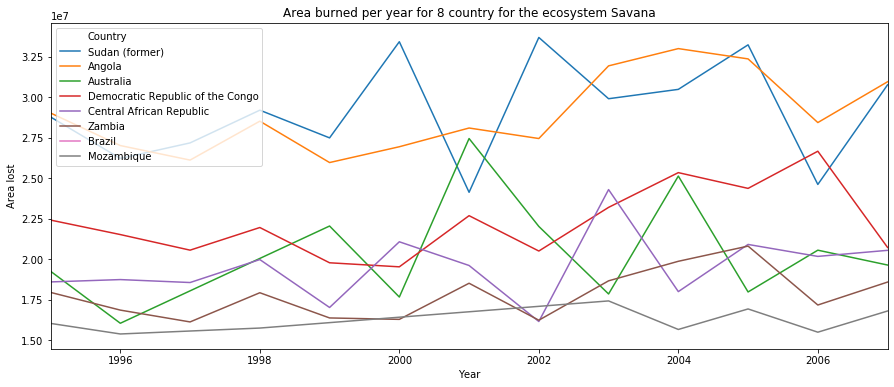

In [19]:
z= savannaCountry[savannaCountry['Ecosystem'] == 'Savanna']\
                        .groupby(['Year','Country'])['Area_loss']\
                        .sum()\
                        .sort_values(ascending = False)\
                        .to_frame()[:85]\
                        .reset_index()
plt.figure(figsize=(15,6))


ax = sns.lineplot(x="Year", y="Area_loss", hue="Country", data=z)

ax.set_title('Area burned per year for 8 country for the ecosystem Savana')
ax.set_xlim([1995,2007]);
plt.xlabel('Year');
plt.ylabel('Area lost');

We see on the plot that our values are widely distributed. Indeed here we plot the countries with the biggest loses but a lot of other countries have 0 loses or near 0 values. If needed, a log scale can be used to see them clearly.

#### Use of Savanna

The final dataframe: "savannaFinal" will be joined to the forest one to answer to the following question:
- What is the global evolution of the cultivated surface on a world scale from 1995 to 2007?
- What is the area lost of savanna, shrubland, grassland and forest per country?
- Do we see a correlation between the area lost by ecosystems and the area gain by agriculture?
- If there is a correlation between an increase in area cultivated and area lost from all the ecosystems, what would be approximatively the area lost because of these crops in particular?

<a id="forests"></a>
### Forests

In [58]:
forests = pd.read_csv(datapath + current_fao + "Emissions_Land_Use_Forest_Land_E_All_Data_(Norm).csv", sep=",", encoding="ANSI")         # Less forests
forests.dtypes

Country Code      int64
Country          object
Item Code         int64
Item             object
Element Code      int64
Element          object
Year Code         int64
Year              int64
Unit             object
Value           float64
Flag             object
dtype: object

In [59]:
forests

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6661,Forest,5110,Area,1990,1990,1000 Ha,1350.0000,F
1,2,Afghanistan,6661,Forest,5110,Area,1991,1991,1000 Ha,1350.0000,F
2,2,Afghanistan,6661,Forest,5110,Area,1992,1992,1000 Ha,1350.0000,F
3,2,Afghanistan,6661,Forest,5110,Area,1993,1993,1000 Ha,1350.0000,F
4,2,Afghanistan,6661,Forest,5110,Area,1994,1994,1000 Ha,1350.0000,F
...,...,...,...,...,...,...,...,...,...,...,...
73062,5873,OECD,6749,Forest land,72172,Net emissions/removal (CO2eq) (Forest land),2011,2011,Gigagrams,-818448.2103,A
73063,5873,OECD,6749,Forest land,72172,Net emissions/removal (CO2eq) (Forest land),2012,2012,Gigagrams,-818448.2103,A
73064,5873,OECD,6749,Forest land,72172,Net emissions/removal (CO2eq) (Forest land),2013,2013,Gigagrams,-818448.2103,A
73065,5873,OECD,6749,Forest land,72172,Net emissions/removal (CO2eq) (Forest land),2014,2014,Gigagrams,-818448.2103,A


#### Description :

As you can see above, this dataset contains the same columns as savanna.

It contains 73067 rows and it is registered by year for each Country, item and element from 1990 to 2015. 

In [60]:
forests.shape

(73067, 11)

#### Selection of useful data : 

In [61]:
print(pd.Series.unique(forests.Item))
print(pd.Series.unique(forests.Element))

['Forest' 'Net Forest conversion' 'Forest land']
['Area' 'Implied emission factor for CO2'
 'Net emissions/removals (CO2) (Forest land)'
 'Net emissions/removal (CO2eq) (Forest land)']


We see that we have three different possible items. For this project, we only care about the biomes that are destructed, therefore we only keep the item "Net Forest Conversion" which represent the area of deforestation (for agriculture, mines, urbanisation, ...). We also see that we have multiple possible elements. The area is the one of interest for us. 

In [62]:
forests = forests.query("Item == 'Net Forest conversion'")
forests = forests.query("Element == 'Area'")
forests.shape

(6817, 11)

As we can see, we only have 6817 rows left already. What about the Flag column now ?

In [63]:
print(pd.Series.unique(forests.Flag))

['Fc' 'A']


We have two kind of flags : 
- "Fc" which tells that the data is only calculated
- "A" which tells that the data is aggregated and may include official, semi-official estimated or calculated data

We don't really care how the data was collected. Therefore, we will remove this column. 

In [64]:
forests = forests.drop(columns="Flag")

Looking at the unit of the areas, we see that it is in 1000 Ha. To be consistent with the Savanna dataset, we need to convert the area into a unit of 1 Ha (and then remove the unit colum alltogether):

In [65]:
forests.Value = forests.Value*1000
forests = forests.drop(columns="Unit")

Then, we will also remove the column Element, since we our dataframe only contains area now. We will also remove code columns and do some renaming to be consistent with Savanna. Finally a rename "Net Forest Conversion" into "Forest" since it is clear from our project that we only consider lost areas:

In [66]:
forests = forests.drop(columns=["Item Code", "Element Code", "Year Code", "Element"])
forests = forests.rename(columns={"Item":"Ecosystem", "Value":"Area_loss"})
forests.Ecosystem = "Forest" 
# Based on results from other datasets, we only keep data between 1995 and 2007 :
forests = forests[forests.Year >= 1995]
forests = forests[forests.Year <= 2007]
forests

,Country Code,Country,Ecosystem,Year,Area_loss
109,2,Afghanistan,Forest,1995,0.0
110,2,Afghanistan,Forest,1996,0.0
111,2,Afghanistan,Forest,1997,0.0
112,2,Afghanistan,Forest,1998,0.0
113,2,Afghanistan,Forest,1999,0.0
...,...,...,...,...,...
72924,5873,OECD,Forest,2003,1725477.4
72925,5873,OECD,Forest,2004,1725477.4
72926,5873,OECD,Forest,2005,1725477.4
72927,5873,OECD,Forest,2006,2187015.0


In [67]:
forests.isna().drop_duplicates()

,Country Code,Country,Ecosystem,Year,Area_loss
109,False,False,False,False,False


As we can see above, there are no na/Nan values inside this dataframe.

Now about the countries. Looking at the country code, it seems like there are 5873 different countries ? What about the actual countries : 

In [68]:
pd.Series.nunique(forests.Country)

267

There are only 272 country like elements, which makes more sense. let see the country code:

In [69]:
pd.Series.unique(forests["Country Code"])

array([   2,    3,    4,    5,    6,    7,  258,    8,    9,    1,   22,
         10,   11,   52,   12,   13,   16,   14,   57,  255,   15,   23,
         53,   17,   18,   19,   80,   20,   21,  239,   26,   27,  233,
         29,   35,  115,   32,   33,   36,   37,   39,  259,   40,  351,
         41,   44,   45,   46,   47,   48,  107,   98,   49,   50,  167,
        116,  250,   54,   72,   55,   56,   58,   59,   60,   61,  178,
         63,  238,   65,   64,   66,   67,   68,   69,   70,   74,   75,
         73,   79,   81,   82,   84,   85,   86,   87,   88,   89,   90,
        175,   91,   93,   95,   97,   99,  100,  101,  102,  103,  104,
        264,  105,  106,  109,  110,  112,  108,  114,   83,  118,  113,
        120,  119,  121,  122,  123,  124,  125,  126,  256,  129,  130,
        131,  132,  133,  134,  127,  135,  136,  137,  270,  138,  145,
        141,  273,  142,  143,  144,   28,  147,  148,  149,  150,  151,
        153,  156,  157,  158,  159,  160,  161,  1

We see that there is something special with the numbering of the country : Some numbers are not there (232 for example), but more importantly, the numbers jump to around 5'000. What data is contained whith these 5'000+ country codes? 

Apprently, these "countries" are in fact geographical and economical regions/continent. We will store them in different dataframes, as in Savanna, for later use : 

In [70]:
forestsCountry = forests[forests["Country Code"] < 5000].drop(columns="Country Code")
forestsRegion_eco = forests[forests["Country Code"] >= 5000]
forestsRegion = forestsRegion_eco[forestsRegion_eco["Country Code"] < 5700].drop(columns="Country Code")
forestsEconomical_segment = forestsRegion_eco[forestsRegion_eco["Country Code"] >= 5700].drop(columns="Country Code")
forests = forests.drop(columns="Country Code")

In [71]:
forestsCountry.head(5)

,Country,Ecosystem,Year,Area_loss
109,Afghanistan,Forest,1995,0.0
110,Afghanistan,Forest,1996,0.0
111,Afghanistan,Forest,1997,0.0
112,Afghanistan,Forest,1998,0.0
113,Afghanistan,Forest,1999,0.0


In [72]:
forestsRegion.head(5)

,Country,Ecosystem,Year,Area_loss
64510,World,Forest,1995,13029740.8
64511,World,Forest,1996,13029740.8
64512,World,Forest,1997,13029740.8
64513,World,Forest,1998,13029740.8
64514,World,Forest,1999,13029740.8


In [73]:
forestsEconomical_segment.head(5)

,Country,Ecosystem,Year,Area_loss
71044,European Union,Forest,1995,266140.1
71045,European Union,Forest,1996,266140.1
71046,European Union,Forest,1997,266140.1
71047,European Union,Forest,1998,266140.1
71048,European Union,Forest,1999,266140.1


#### Analysis of the desired value

In [74]:
forestsCountry["Area_loss"].describe()

count    2.948000e+03
mean     5.562358e+04
std      2.156696e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+01
75%      1.700000e+04
max      2.996800e+06
Name: Area_loss, dtype: float64

<a id="merge"></a>
### Merge of the Biomes Data Set

In [20]:
#savannaRegion.head()
#savannaCountry.head()
#savannaEconomical_segment.head()
#perform the merge with forest

<a id="crops"></a>
# Crops

The dataset `Crops` give us informations about distribution of crops in different areas over the years. We investigate this data set more in details in the file `Crops.ipynb` and will only present here the conclusive data sets and analysis. 

In [12]:
crops.dtypes

country_or_area     object
element_code        object
element             object
year               float64
unit                object
value              float64
value_footnotes     object
category            object
dtype: object

In [18]:
crops.shape

(2255349, 8)

In [19]:
crops.head()

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Americas +,31,Area Harvested,2007.0,Ha,49404.0,A,agave_fibres_nes
1,Americas +,31,Area Harvested,2006.0,Ha,49404.0,A,agave_fibres_nes
2,Americas +,31,Area Harvested,2005.0,Ha,49404.0,A,agave_fibres_nes
3,Americas +,31,Area Harvested,2004.0,Ha,49113.0,A,agave_fibres_nes
4,Americas +,31,Area Harvested,2003.0,Ha,48559.0,A,agave_fibres_nes


## Discussion on the Investigation

From investigation following, we describe each features of the dataFrame: \
   * `country_or_area`: area where the product is cultivated. From the investigation, we observe different regroupments for those areas. They can correspond to countries, regions such as continents or even the world or economical regroupments such as `Low Income Food Deficit Countries`. 
   * `element`: gives us a number of different informations about the adding of the crops. We have lot of information on PIN, which is a production index qualifying the land needed per unit of crop production in 1961.We also have informations on  Seeds and Yields. IN order to answer our specific question, we will only keep `Area Harvested` and `ProductionQuantity`, respectively in Hectars and Tonnes as it can be seen in the feature `unit`. From now on, the data frames will be generated for both elements. 
   * `year`: the years are from 1961 to 2007. As the datasets `Savanna` and `Forests` are restricted to 1990, we choose to start at 1990 too in order to be able to conduct correlations. From the investigation, we can see that th enumber of data is uneven through time with a lot less data in the older years. 
   * `value`: feature of biggest interest as it will give us the corresponding value. Units are given in the `unit` feature and correspond to the information said in `element`.
   * `category`: the sort of product that is concerned by the informations. From the investigation, we see that there are also regroupments. Hence, we can find products by themselves such as `Bananas` or groups of products such as `cereals_total`. 
   
We decided to present the results for the products in two parts. First, we will observe the phenomena globally, by countries and using all the products all together. in the second part, we will work on only 5 specific food products in order to have a specific idea of the phenomena. We chose `Bananas`, `palm_oil`, `sojabean`, `banana`, `wheat`, `rice` because we though that they are a good compromise between the top ranked products for productiona and area harvested and top ranked products for inport and export. We want to be able to see interesting and different results, that is why if we realize that products in the list present similar results, we let us the possibility to take another one. 
    
Let's start the investigation. We will now investigate each features in order to have an idea of what kind of information we have.

## Investigation of Crops
### Element Code 
Let's start the investigation by understanding what categories of inforamtions we have.  


In [20]:
crops.groupby('element_code').count()

,country_or_area,element,year,unit,value,value_footnotes,category
element_code,,,,,,,
111,204568,204568,204568,204568,204568,188064,204568
152,9399,9399,9399,9399,9399,9399,9399
154,9399,9399,9399,9399,9399,9399,9399
31,671153,671153,671153,671153,671153,473111,671153
41,631078,631078,631078,631078,631078,615683,631078
432,9145,9145,9145,9145,9145,9145,9145
434,9145,9145,9145,9145,9145,9145,9145
436,9145,9145,9145,9145,9145,9145,9145
438,9145,9145,9145,9145,9145,9145,9145


We can see that for elements that are not numbers, the data seem to be missing.

In [21]:
crops.loc[crops.element_code == 'FAO Estimate']

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
2401,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,agave_fibres_nes
11396,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,almonds_with_shell
20081,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,anise_badian_fennel_corian
34985,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,apples
46753,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,apricots
...,...,...,...,...,...,...,...,...
2194131,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,walnuts_with_shell
2213221,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,watermelons
2239308,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,wheat
2252286,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,yams


It seems to be because for those categories of elements, the values are NaN. We won't be able to fill them so we remove them. 

### Value Footnotes
From the `FAO website`, we see that it corresponds to how the data were collected. The information won't help us for our questions so we remove the feature.

In [22]:
crops.groupby('value_footnotes').count()

,country_or_area,element_code,element,year,unit,value,category
value_footnotes,,,,,,,
A,974473,974473,974473,974473,974473,974473,974473
F,264501,264501,264501,264501,264501,264501,264501
Fc,386744,386744,386744,386744,386744,386744,386744
NR,150249,150249,150249,150249,150249,150249,150249


In [23]:
#remove value_footnotes and element_code
crops = crops.drop(columns=['value_footnotes', 'element_code'])

In [24]:
# remove missing values
crops = crops.dropna()
crops.shape

(2254385, 6)

In [25]:
crops.sort_values('value', ascending=False)

,country_or_area,element,year,unit,value,category
455824,World +,Production Quantity,2007.0,tonnes,2.351396e+09,cereals_total
455827,World +,Production Quantity,2004.0,tonnes,2.280834e+09,cereals_total
455826,World +,Production Quantity,2005.0,tonnes,2.267177e+09,cereals_total
455825,World +,Production Quantity,2006.0,tonnes,2.239236e+09,cereals_total
363756,World +,Production Quantity,2007.0,tonnes,2.131753e+09,cereals_rice_milled_eqv
...,...,...,...,...,...,...
1329116,Belize,Yield,1984.0,Hg/Ha,0.000000e+00,onions_inc_shallots_green
1329115,Belize,Yield,1985.0,Hg/Ha,0.000000e+00,onions_inc_shallots_green
1329114,Belize,Yield,1986.0,Hg/Ha,0.000000e+00,onions_inc_shallots_green
1329113,Belize,Yield,1987.0,Hg/Ha,0.000000e+00,onions_inc_shallots_green


We can still see a lot of 0 values. We will keep them for now.\
### Element

Now let's observe a little bit more what kind of data are given. 

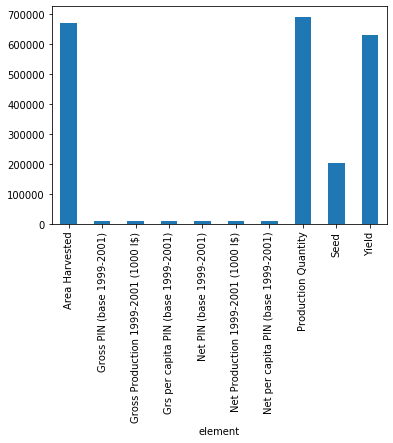

In [27]:
elements = crops.copy()
elements = elements.groupby('element').count()
elements['value'].plot(kind='bar')

In [29]:
#look at the order of values for the different elements 
#here look at 'Gross PIN (base 1999-2001)''
crops.loc[crops.element == 'Gross PIN (base 1999-2001)'].head()

,country_or_area,element,year,unit,value,category
364728,Afghanistan,Gross PIN (base 1999-2001),2007.0,Int. $,235.0,cereals_total
364729,Afghanistan,Gross PIN (base 1999-2001),2006.0,Int. $,188.0,cereals_total
364730,Afghanistan,Gross PIN (base 1999-2001),2005.0,Int. $,221.0,cereals_total
364731,Afghanistan,Gross PIN (base 1999-2001),2004.0,Int. $,144.0,cereals_total
364732,Afghanistan,Gross PIN (base 1999-2001),2003.0,Int. $,180.0,cereals_total


In [30]:
crops.loc[crops.element == 'Net Production 1999-2001 (1000 I$)'].head()

,country_or_area,element,year,unit,value,category
364587,Afghanistan,Net Production 1999-2001 (1000 I$),2007.0,1000 Int. $,861765.0,cereals_total
364588,Afghanistan,Net Production 1999-2001 (1000 I$),2006.0,1000 Int. $,679843.0,cereals_total
364589,Afghanistan,Net Production 1999-2001 (1000 I$),2005.0,1000 Int. $,803456.0,cereals_total
364590,Afghanistan,Net Production 1999-2001 (1000 I$),2004.0,1000 Int. $,511338.0,cereals_total
364591,Afghanistan,Net Production 1999-2001 (1000 I$),2003.0,1000 Int. $,652969.0,cereals_total


PIN: production index = land needed per unit of crop production in 1961 (in 1961 = 1): it won't interest us because it will be hard to put it in correlation to the other data sets. 

Gross PIN (base 1999-2001): not interessted \
Gross Production 1999-2001 (1000 dollars): not interested in looking at monetary values \
Grs per capita PIN (base 1999-2001): not interested in PIN \
Net PIN (base 1999-2001): not interested in PIN \
Net per capita PIN (base 1999-2001): not interested in PIN \
Net Production 1999-2001 (1000 dollars): not interested in looking at monetary values

We won't be interested by all of that. We can also remove `Seed` and `Yield` \
Hence we only keep `Area Harvested` and `Production Quantity` that we separate in 2 tables.

In [32]:
# create one df for the elements we are not interested, another for the 2 interesting elements
crops_no_interest = crops.loc[~(crops.element=='Area Harvested')\
                                     & ~(crops.element=='Production Quantity')] #every elements except the 2 of interest 
crops_interest = crops.drop(crops_no_interest.index, axis=0)

### Unit 

Now we only have 2 elements. We want to check that they indeed don't have the same units and tha twe need to separate them in 2 different df.

In [33]:
crops_interest[(crops_interest.unit=='Ha') & (crops_interest.element=='Production Quantity')]

,country_or_area,element,year,unit,value,category


As they don't have the same unit, we need to separate them in 2 different tables.\
Now we can look at the other informations. We will continue the analysis by creating both tables every time as we will need both depending on the question. Nevertheless, we will print the df of only the `Area Harvested` informations for more readability. 


In [34]:
crops_area = crops_interest[crops_interest.element=='Area Harvested'] #in Ha : area added 
crops_prod = crops_interest[crops_interest.element=='Production Quantity'] #in tonnes : production

### Year

Last thing to study before looking at the informations about the products by themselves is the repartition of data over the years. 

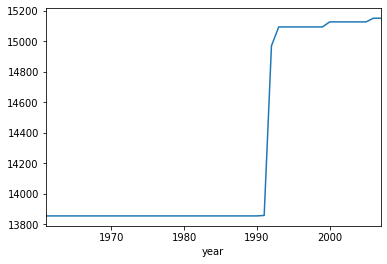

In [36]:
year_area = crops_area.copy()
year_area.groupby('year')['value'].count().plot()

One can see that the number of data over time is very different from 1961 to 2007. An interesting point could be to know if it is due to the development of data collection in the last years or if the difference of entries is really due to the difference of expansion of agriculture. 

### Country or Area 

We need to have both data frame. 

In [37]:
regions_prod = crops_prod.copy()
regions_area = crops_area.copy()

#area harvested for each country/region
regions_area.groupby('country_or_area')["value"].sum().sort_values(ascending=False).to_frame()

,value
country_or_area,
World +,1.599868e+11
Low Income Food Deficit Countries +,7.665792e+10
Asia +,6.836644e+10
Europe +,3.424290e+10
Americas +,3.374058e+10
...,...
US Virgin Islands,1.060000e+04
Faroe Islands,9.732000e+03
Cayman Islands,8.126000e+03


We can see that the areas with the most entries of values consists in regions of the world such as continents or `Low Income Deficit Countries` which corresponds to economical regions, all ending with a `+`. As they regroup a lot of countries, they are not at the same scale as individual countries and we can separate the 3 categories (individual countries vs. areas/regions vs. economical regions).

##### Useful data frames

In [42]:
#specific global areas (regions or economical areas all finish by '+'

#create dataframe for all non-countries areas
crops_regions_area = regions_area[[name.endswith('+') for name in regions_area.country_or_area]]
crops_regions_prod = regions_prod[[name.endswith('+') for name in regions_prod.country_or_area]]

#dataframes for countries
crops_countries_area = regions_area.drop(crops_regions_area.index, axis=0)
crops_countries_prod = regions_prod.drop(crops_regions_prod.index, axis=0)

#list of the economical regions 
economical_segments = ['Least Developed Countries +', 'LandLocked developing countries +',
       'Small Island Developing States +', 'Low Income Food Deficit Countries +', 'Net Food Importing Developing Countries +']

#dataframes for economical areas
crops_eco_area = regions_area.loc[regions_area['country_or_area'].isin(economical_segments)]
crops_eco_prod = regions_prod.loc[regions_prod['country_or_area'].isin(economical_segments)]

#dataframes for regional areas
crops_regions_area = crops_regions_area.loc[~regions_area['country_or_area'].isin(economical_segments)]
crops_regions_prod = crops_regions_prod.loc[~regions_prod['country_or_area'].isin(economical_segments)]

##### Displaying

In [43]:
#display area harvested by economic areas
crops_eco_area.groupby('country_or_area')["value"].sum().sort_values(ascending=False).to_frame()

,value
country_or_area,
Low Income Food Deficit Countries +,7.665792e+10
Net Food Importing Developing Countries +,2.221224e+10
Least Developed Countries +,1.568426e+10
LandLocked developing countries +,8.058806e+09
Small Island Developing States +,6.466597e+08


In [44]:
#display area harvested by regional areas
crops_regions_area.groupby('country_or_area')["value"].sum().sort_values(ascending=False).to_frame()

,value
country_or_area,
World +,1.599868e+11
Asia +,6.836644e+10
Europe +,3.424290e+10
Americas +,3.374058e+10
Southern Asia +,3.085033e+10
Eastern Europe +,2.396467e+10
Eastern Asia +,2.206147e+10
Africa +,2.097670e+10
Northern America +,1.939848e+10


Even now we can see that some reginal areas are redundant, for example, `Europe` is counted by itself and separated in `Southern Europe`, `Northern Europe`, `Eastern Europe` and `Western Europe`. That explains why the value for `World` is different from the sum of all the rest. \
It is interesting to see that `Low Income Food Deficit Countries` have more areas harvested than the entire `Asia`. We will analyse that further in Milestone 3. 

In [45]:
#display area harvested per countries  
crops_countries_area.groupby('country_or_area')["value"].sum().sort_values(ascending=False).to_frame().head(10)

,value
country_or_area,
India,2.391471e+10
China,2.069723e+10
"China, mainland",2.054710e+10
United States of America,1.569625e+10
USSR,1.495057e+10
Brazil,6.147899e+09
Nigeria,4.088043e+09
Canada,3.702207e+09
Indonesia,3.110258e+09


There are 217 countries listed here. Knowing that there are as of today 195 countries in the world, we will need to consider that over time some countries disappeared, such as `USSR` or that countries are counted twice such as `China` and `China, mainland`.

### Categories of products

Now we are gonna investigate the products by themselves. \
Let's just try to observe results for countries individually as the results would be similar for bigger areas. 

In [47]:
category_area = crops_countries_area.copy()
category_prod = crops_countries_prod.copy()

#area harvested for each products for all countries
category_area.groupby('category')["value"].sum().sort_values(ascending=False).to_frame().head(15)

,value
category,
cereals_total,3.679708e+10
cereals_rice_milled_eqv,3.679708e+10
coarse_grain_total,1.699700e+10
wheat,1.165933e+10
oilcrops_primary,9.207386e+09
oilcakes_equivalent,8.815416e+09
rice_paddy,8.140748e+09
maize,6.927290e+09
pulses_total,3.387550e+09


Here, again, we can see some categorization such as `_total` or `_eqv` that we need to put in another dataframe in order to be able to compare the different products individually on the same scale. 170 different categories of aliments are harvested in total (based on the size of the df). 

##### Useful data frames 

In [48]:
crops_indiv_area = category_area.copy()
crops_indiv_prod = category_prod.copy()

#df with categories of products 
crops_totals_area = crops_indiv_area[[name.endswith('_total') | name.endswith('_eqv') \
                                      | name.endswith('_equivalent') | name.endswith('_primary') \
                                      for name in crops_indiv_area['category']]]
crops_totals_prod = crops_indiv_prod[[name.endswith('_total') | name.endswith('_eqv') \
                                      | name.endswith('_equivalent') | name.endswith('_primary') \
                                      for name in crops_indiv_prod['category']]]

#df with only individual products 
crops_indiv_area = crops_indiv_area.drop(crops_totals_area.index, axis=0)
crops_indiv_prod = crops_indiv_prod.drop(crops_totals_prod.index, axis=0)

##### Displaying 

In [50]:
crops_indiv_area.groupby("category")["value"].sum().sort_values(ascending=False).to_frame().head(10)

,value
category,
wheat,1.165933e+10
rice_paddy,8.140748e+09
maize,6.927290e+09
barley,3.302561e+09
soybeans,2.838546e+09
sorghum,2.300379e+09
millet,2.007758e+09
seed_cotton,1.805924e+09
beans_dry,1.250165e+09


(1995, 2007)

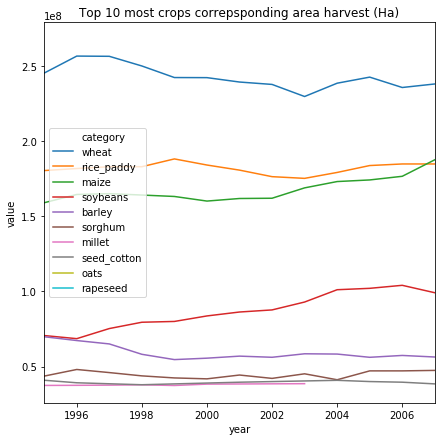

In [51]:
x = crops_indiv_area.groupby(['year','category'])['value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:350]\
                                                    .reset_index()
plt.figure(figsize=(7,7))


ax = sns.lineplot(x="year", y="value", hue="category",
                   data=x)

ax.set_title('Top 10 most crops correpsponding area harvest (Ha)')
ax.set_xlim([1995,2007])

In [52]:
crops_indiv_prod.groupby("category")["value"].sum().sort_values(ascending=False).to_frame().head(10)

,value
category,
sugar_cane,4.469464e+10
rice_paddy,2.768484e+10
wheat,2.492530e+10
maize,2.424903e+10
potatoes,1.514378e+10
sugar_beet,1.228800e+10
sweet_potatoes,1.092999e+10
vegetables_fresh_nes,8.518075e+09
barley,6.832736e+09


(1995, 2007)

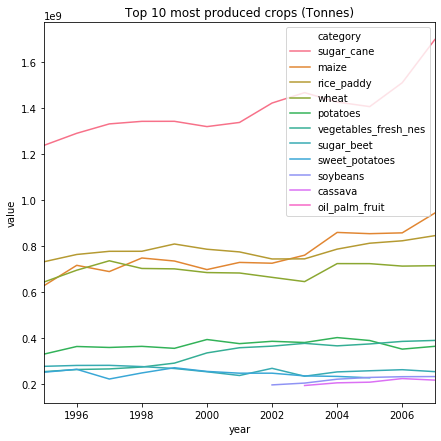

In [53]:
x = crops_indiv_prod.groupby(['year','category'])['value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:350]\
                                                    .reset_index()
plt.figure(figsize=(7,7))


ax = sns.lineplot(x="year", y="value", hue="category",
                   data=x)

ax.set_title('Top 10 most produced crops (Tonnes)')
ax.set_xlim([1995,2007])

We see a lot of similarities between top ranked products for `Area Harvested` and `Production Quantities`. We still see some differences that will be interested to study and to put in relationship with the other datasets.

We can also see that some data are missing in certain years for some products.

<a id="livestock"></a>
### Livestock

In [14]:
livestock.dtypes

Area Code         int64
Area             object
Item Code         int64
Item             object
Element Code      int64
Element          object
Year Code         int64
Year              int64
Unit             object
Value           float64
Flag             object
dtype: object

In [15]:
livestock.head(5)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1961,1961,tonnes,0.0,NaN
1,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1962,1962,tonnes,0.0,NaN
2,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1963,1963,tonnes,0.0,NaN
3,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1964,1964,tonnes,0.0,NaN
4,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1965,1965,tonnes,0.0,NaN


<a id="questions"></a>
## Data to Answer the Questions 


##### Question 1. 
What is the global evolution of the cultivated surface on a world scale from 1990 to 2007?

(1995, 2007)

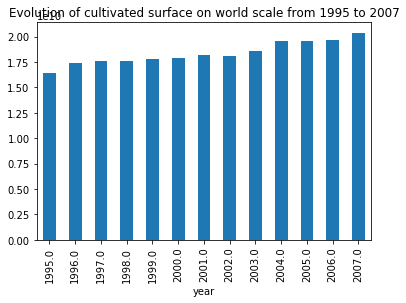

In [71]:
#use of the Crops data frame: 
world_surface = crops[(crops.country_or_area == 'World +') \
                      & (crops.year >= 1995) & (crops.year <= 2007)]\
                        .groupby('year')['value'].sum()
world_surface.plot(kind='bar')
plt.title('Evolution of cultivated surface on world scale from 1995 to 2007')
ax.set_xlim([1995,2007])

##### Question 2. 
What is the area lost of savanna, shrubland, grassland and forest per country?

##### Question 3. 
Do we see a correlation between the area lost by ecosystems and the area gain by agriculture?

For the use of the `Crops` dataset, we will use the same principle as for Question 1. but for each countries. As we do the same for burned areas in different biomes, we will try to correlate both and deduce the loss of ecosystems to agriculture.

##### Question 4. 
For each selected crop, Sojabean, banana, wheat, rice, palm oil, what pourcentage of the total cultivated area do they represent? 

We will show how we will answer this question with the example of `Bananas`

In [58]:
# from the Crops dataframe: 
bananas_prod = crops_indiv_prod.copy()
bananas_prod = bananas_prod[(bananas_prod['category']=='bananas')]\
                                        .groupby('year')['value'].sum()\
                                        .sort_values(ascending =False)\
                                        .to_frame()\
                                        .reset_index()
bananas_prod.head()

,year,value
0,2007.0,93652856.0
1,2006.0,89788488.0
2,2005.0,85267584.0
3,2004.0,80866125.0
4,2003.0,76112799.0


##### Question 5. 
If there is a correlation between an increase in area cultivated and area lost from all the ecosystems, what would be approximatively the area lost because of these crops in particular?

##### Question 6. 
Is sojabean, banana, wheat, rice, palm oil is meant for exportation and/or importation for each country over the years? Check more precisely for different economical segments and regions.